## 1. Informacion general

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st 
import math as mt
import seaborn as sns

In [3]:

games=pd.read_csv('Datasets/games.csv',keep_default_na=False)
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,,,
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,,,


## Preparacion de datos

In [4]:
new_columns=games.columns.str.lower()
games.columns=new_columns

games['critic_score']=pd.to_numeric(games['critic_score'],errors='coerce')
games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [6]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,30.38


Para la preparacion de los datos, se decide dejar como celda vacia los valores ausentes para asi, poder convertir toda la columna al tipo de dato entero y despues, poder operar sobre esta.
'TBD' se toma tambien como un valor ausente.

## Analisis de datos 

###  cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


<Axes: title={'center': 'Distribucion de juegos lanzados por año'}, xlabel='year_of_release'>

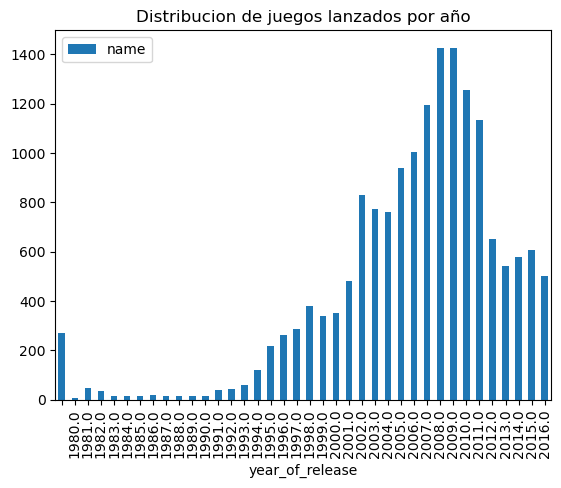

In [7]:
year_games=games.groupby('year_of_release')['name'].count().reset_index()
year_games


year_games.plot(kind='bar',x='year_of_release',title='Distribucion de juegos lanzados por año')

A traves de este gráfico se puede decir que hubo una tendencia mayor de lanzamiento hasta el 2011, y desde este periodo comenzaron a disminuir los lanzamientos cada periodo. 
Al analizar las ventas antes y despues de este pico del 2011 y 2012, se puede decir que si tienen diferencia significativa tomado periodos en decadas.

### Plataformas con las mayores ventas totales 

In [8]:
ventas_mayores=games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(5)
ventas_mayores

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86


<Axes: title={'center': 'Ranking de las plataformas más populares'}, xlabel='Platform', ylabel='Millones de dólares vendidos en juegos'>

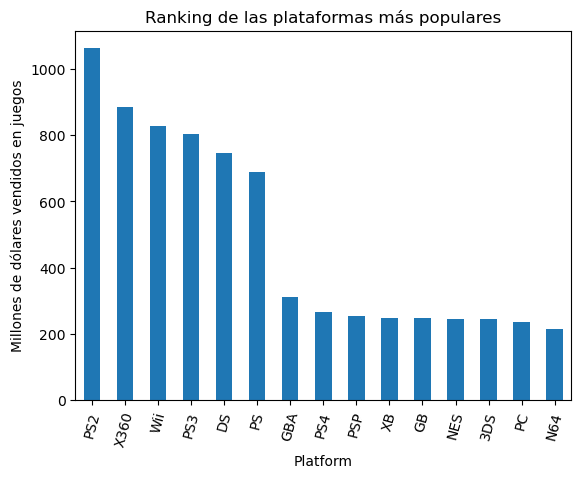

In [9]:

games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15).plot(kind='bar',rot=75, xlabel='Platform', ylabel='Millones de dólares vendidos en juegos', title='Ranking de las plataformas más populares')

In [10]:
platforms_top = games[(games['platform'] == 'PS2') | (games['platform'] == 'X360') | (games['platform'] == 'PS3') | (games['platform'] == 'Wii') | (games['platform'] == 'DS')].pivot_table(index="year_of_release", columns="platform", values="total_sales",aggfunc='sum')
platforms_top

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
,3.12,19.24,7.22,14.97,9.30
1985.0,0.02,NaN,NaN,NaN,NaN
2000.0,NaN,35.59,NaN,NaN,NaN
2001.0,NaN,149.65,NaN,NaN,NaN
2002.0,NaN,183.66,NaN,NaN,NaN
2003.0,NaN,163.62,NaN,NaN,NaN
2004.0,15.91,171.96,NaN,NaN,NaN
2005.0,119.34,141.51,NaN,NaN,7.61
2006.0,111.64,89.18,17.30,123.63,47.20


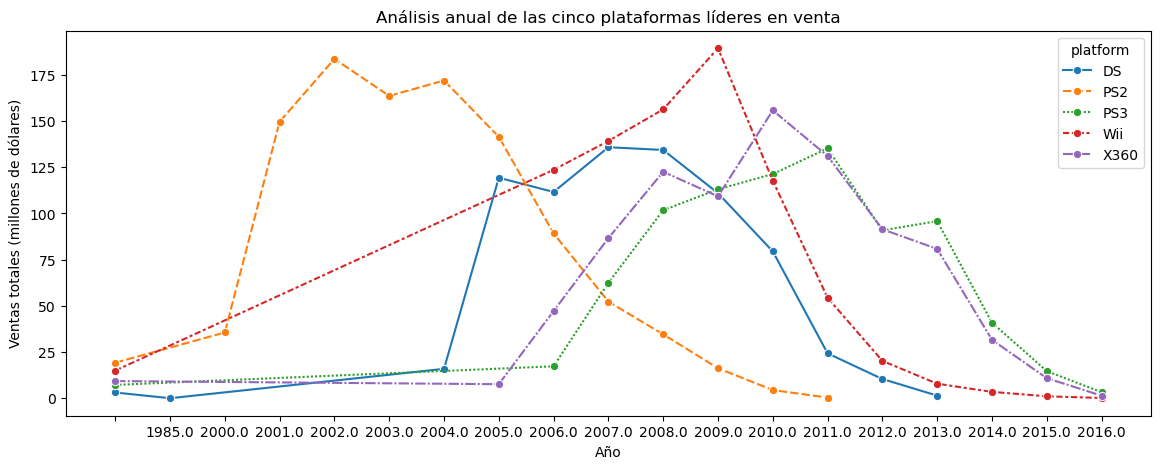

In [11]:
plt.figure(figsize=(14,5))
sns.lineplot(data=platforms_top,marker='o')
plt.ylabel('Ventas totales (millones de dólares)')
plt.title('Análisis anual de las cinco plataformas líderes en venta')
plt.xlabel('Año')
plt.show()

De la gráfica anterior se puede resaltar: la subida inmediata que tuvo Wii durante el 2007 y 2009 y a su vez, su desplome repentino, plataformas mas estables durante un largo tiempo como DS, X360 y PS3, finalmente de PS2 se puede decir que tuvo su momento cumbre a partir de 2000 hasta el 2007 cuando las demas plataformas comienzan su mejor momento. 

#### Ahora se busca analizar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [12]:
platform_table=games.pivot_table(index='platform',columns='year_of_release',values='total_sales')
platform_table


year_of_release,,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,0.613529,1.251111,0.768696,0.793611,0.525455,0.270000,0.450000,0.335000,0.321667,0.365000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,0.137500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.506897,0.524409,0.593077,0.521875,0.311047,0.315217
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020000,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,0.104000,NaN,NaN,NaN,NaN,NaN,0.020000,NaN,NaN,NaN,...,0.361303,0.273110,0.275409,0.246068,0.158824,0.453043,0.177500,NaN,NaN,NaN
GB,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,0.440909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.558333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,0.153571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_Para resolver esta pregunta, se considera como años de interes a partir del 2011 en adelante_.Las plataformas que tuvieron ventas antes de este año se consideran antiguas. 
A partir de esto,entre las plataformas que solian ser populares estan: 2600,siendo de las que prevalecio por mayor cantidad de años,NES,GB,GBA,GEN, entre otras.
Se resalta tambien, PC una plataforma que surgio en 1985 y ha mantenido la participacion a la fecha, otras plataformas que surgieron antes del 2010 y continuaron hasta una decada actual son PS3,PSP,X360,XB,Wii.

_El tiempo de lanzamiento o caida de las plataformas es variado_, algunas de estas surgieron la decada de los 80 y se mantuvieron por mas de una decada, y otras por el contrario, han permaecido intermitentes en el mercado. Lo que si se puede resaltar es que, el año 2007 marco un momento relevante tanto en las ventas como en la incorporación de nuevas plataformas.

#### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [13]:
leaders_in_sale=games[games['year_of_release']>'2011'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
leaders_in_sale.head(5)

,platform,total_sales
0,PS3,380.75
1,X360,347.25
2,PS4,265.79
3,3DS,244.54
4,XOne,145.05


In [14]:
leaders_merge=leaders_in_sale.merge(games[games['year_of_release']>'2011'],on='platform',how='left')
leaders_complete=leaders_merge[(leaders_merge['platform'] == 'PS3') | (leaders_merge['platform'] == 'X360') | (leaders_merge['platform'] == 'PS4') | (leaders_merge['platform'] == '3DS') | (leaders_merge['platform'] == 'XOne')].pivot_table(index='year_of_release',columns='platform',values='total_sales_y')
leaders_complete

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2011.0,0.506897,0.628930,NaN,0.636456,NaN
2012.0,0.524409,0.613986,NaN,0.862736,NaN
2013.0,0.593077,0.760714,1.382500,1.077600,0.905789
2014.0,0.521875,0.378519,1.122933,0.501746,0.807541
2015.0,0.311047,0.201370,0.733139,0.310286,0.683375
2016.0,0.315217,0.085000,0.359817,0.107692,0.274828


Text(0, 0.5, 'Total de ventas')

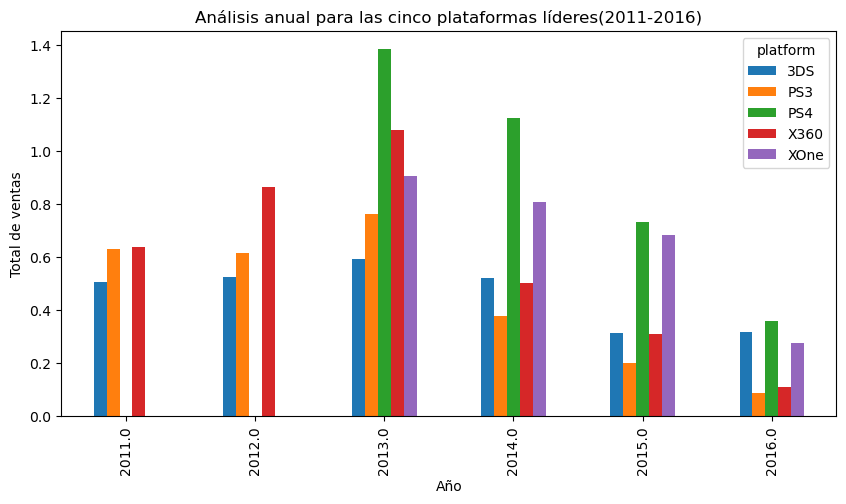

In [15]:

leaders_complete.plot(kind='bar',figsize=[10,5])
plt.title('Análisis anual para las cinco plataformas líderes(2011-2016)')
plt.xlabel('Año')
plt.ylabel('Total de ventas')


Se toman como datos de interes, las ventas a partir del 2011.Segun la grafica y tabla anterior, las plataformas líderes en venta son: x360, PS3 y 3DS como plataformas consolidadas solidas en la ultima decada sin embargo, lo ultimos dos años han disminuido su nivel de participacion, dandole paso a plataformas como PS4 que cuenta con ventas muy significativas desde su incorporacion en 2013 y XOne.


### Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?

In [16]:
games=games[games['year_of_release']>'2011']
more_1m = games[games['total_sales'] > 1]['name'].count()
total= games['name'].count()
print('El porcentaje de juegos que supera el millón de dólares en ventas es de :',(round(more_1m/total, 2)*100),'%')
print()
more_5m = games[games['total_sales'] > 5]['name'].count()
total= games['name'].count()
print('El porcentaje de juegos que supera los cinco millones de dólares en ventas es de :',(round(more_5m/total, 2)*100),'%')
print()
print(games['total_sales'].describe())

El porcentaje de juegos que supera el millón de dólares en ventas es de : 10.0 %

El porcentaje de juegos que supera los cinco millones de dólares en ventas es de : 1.0 %

count    4022.000000
mean        0.433913
std         1.079184
min         0.010000
25%         0.040000
50%         0.120000
75%         0.360000
max        17.090000
Name: total_sales, dtype: float64


In [17]:
games
platform_top_2 = games[(games['platform'] == 'PS3') | (games['platform'] == 'X360') | (games['platform'] == 'PS4') | (games['platform'] == '3DS') | (games['platform'] == 'XOne')]

Text(0, 0.5, 'Ventas por juego')

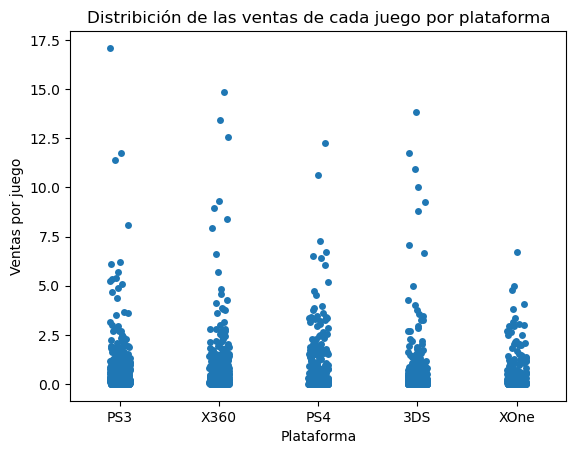

In [18]:

sns.stripplot(x='platform', y='total_sales', data=platform_top_2).set_title('Distribición de las ventas de cada juego por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas por juego')

El gráfico anterior muestra la dispersión de los videojuegos por plataforma. Como se puede ver, PS3 tuvo juegos que superaron los 10 M lo cual indica que este tuvo un exito rotundo en esta plataforma, otras como XOne no presentan una dispersión mayor.
Ahora se va a analizar la media de cada plataforma a través de un diagrama de caja.

Text(0, 0.5, 'Ventas por juego')

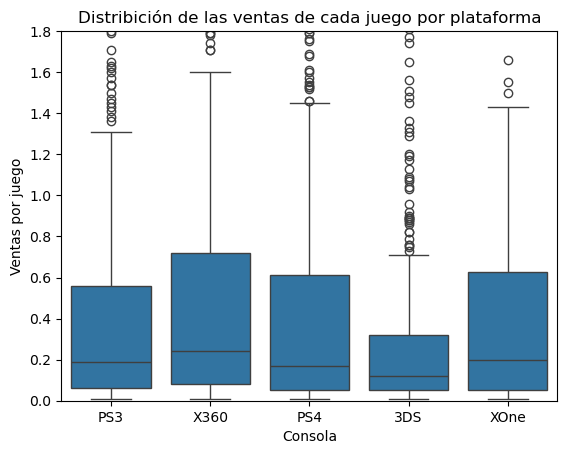

In [19]:
sns.boxplot(x='platform', y='total_sales', data=platform_top_2).set_title('Distribición de las ventas de cada juego por plataforma')
plt.ylim(0,1.8)
plt.xlabel('Consola')
plt.ylabel('Ventas por juego')

En esta gráfica, al comparar las medias se puede ver que mantienen una semejanza entre estas plataformas, exceptuando 3DS que esta por debajo con una gran cantidad de datos atípicos también.

In [20]:
print('Un juego en X360 genera en promedio' ,platform_top_2[platform_top_2['platform'] == 'X360']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en PS3 genera en promedio' ,platform_top_2[platform_top_2['platform'] == 'PS3']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en PS4 genera en promedio' ,platform_top_2[platform_top_2['platform'] == 'PS4']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en 3DS genera en promedio' ,platform_top_2[platform_top_2['platform'] == '3DS']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en X360 genera en promedio' ,platform_top_2[platform_top_2['platform'] == 'XOne']['total_sales'].mean().round(2), 'Millones de dólares')

Un juego en X360 genera en promedio 0.7 Millones de dólares
Un juego en PS3 genera en promedio 0.54 Millones de dólares
Un juego en PS4 genera en promedio 0.68 Millones de dólares
Un juego en 3DS genera en promedio 0.48 Millones de dólares
Un juego en X360 genera en promedio 0.59 Millones de dólares


Finalmente en este apartado se puede concluir que PS4 y X360 dado su venta promedio por juego y la estabilidad de sus datos, se posicionan como las mas competitivas.

#### Correlación entre las reseñas de usuarios y profesionales con respecto a las ventas, para X360

In [21]:
X360=games[games['platform']=='X360'].groupby('critic_score')['total_sales'].sum().reset_index()
X360.head()

,critic_score,total_sales
0,19.0,0.05
1,21.0,0.11
2,26.0,0.12
3,32.0,0.64
4,33.0,0.35


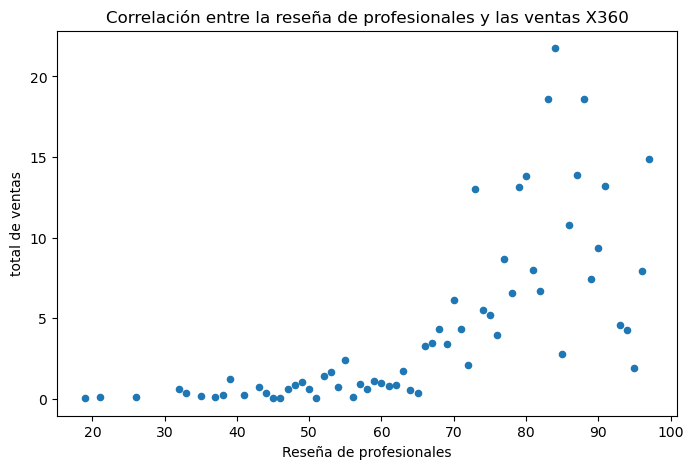

In [22]:
X360.plot(kind='scatter',x='critic_score',y='total_sales',figsize=[8,5]).set_title('Correlación entre la reseña de profesionales y las ventas X360')
plt.xlabel('Reseña de profesionales')
plt.ylabel('total de ventas')
plt.show()

In [23]:
print(X360['critic_score'].corr(X360['total_sales']))

0.6984668543837614


Text(0, 0.5, 'total de ventas')

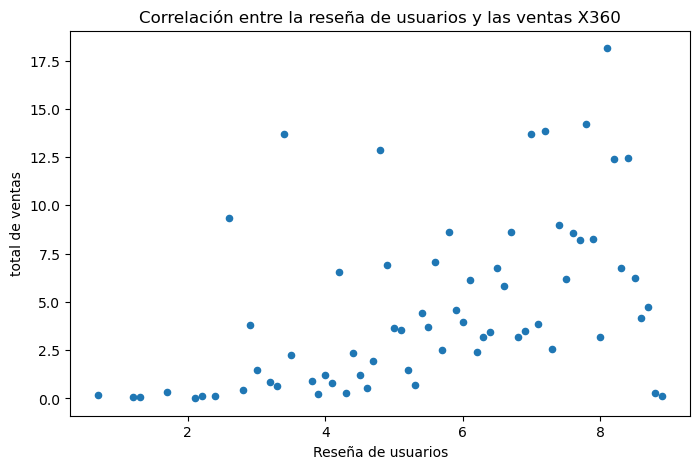

In [24]:
X360_user_score=games[games['platform']=='X360'].groupby('user_score')['total_sales'].sum().reset_index()
X360_user_score.plot(kind='scatter',x='user_score',y='total_sales',figsize=[8,5]).set_title('Correlación entre la reseña de usuarios y las ventas X360')
plt.xlabel('Reseña de usuarios')
plt.ylabel('total de ventas')

In [25]:
print(X360_user_score['user_score'].corr(X360_user_score['total_sales']))

0.48843864625778655


Se muestra una correlación entre la reseña de los profesionales con respecto a las ventas del 0.689 lo que demuestra una relación directamente proporcional, a medida que las reseñas con mas altas, lo serán las ventas. El gráfico confirma este comportamiento con tendencia al crecimiento positivo.
Con respecto a la relación de la reseña de usurios y las ventas, el gráfico se muestra mas disperso, una correlacion del 0.488 lo que demuestra una relación un poco débil para estas variables. Como se puede ver, hubo juegos con una reseña de usuarios baja o intermedia que consiguieron superar ventas de 10 M y , otras por el contrario, con una buena reseña pero con ventas por debajo de los 5 M

### Cómo se comportan los juegos que están presentes en diferentes plataformas ?

In [26]:
games_platforms=games[(games['critic_score']>80)].groupby('name')['platform'].count().reset_index()
games_platforms=games_platforms[games_platforms['platform']>1]


In [27]:
games_merge_platforms=games_platforms.merge(games,on='name',how='left')
games_filter_score=games_merge_platforms.groupby(['name','platform_y'])['total_sales'].sum().reset_index()
games_filter_score=games_filter_score[(games_filter_score['platform_y'] == 'PS3') | (games_filter_score['platform_y'] == 'X360') | (games_filter_score['platform_y'] == 'PS4') | (games_filter_score['platform_y'] == '3DS') | (games_filter_score['platform_y'] == 'XOne')]


_El siguiente análisis se centrara en los 5 juegos con mayores ventas._

In [28]:
games_filter_score_2 = games_filter_score.groupby('name')['total_sales'].sum().reset_index().sort_values(ascending=False,by='total_sales').head(5)
games_filter_score_2

,name,total_sales
47,Grand Theft Auto V,47.60
14,Call of Duty: Modern Warfare 3,25.17
13,Call of Duty: Black Ops II,23.93
12,Call of Duty: Advanced Warfare,18.77
105,The Elder Scrolls V: Skyrim,15.13


In [29]:
games_pivot=games_filter_score[(games_filter_score['name']=='Grand Theft Auto V')|(games_filter_score['name']=='Call of Duty: Modern Warfare 3')|(games_filter_score['name']=='Call of Duty: Black Ops II')|(games_filter_score['name']=='Call of Duty: Advanced Warfare')|(games_filter_score['name']=='The Elder Scrolls V: Skyrim')].pivot_table(index='name',columns='platform_y',values='total_sales')
games_pivot

platform_y,PS3,PS4,X360,XOne
name,,,,
Call of Duty: Advanced Warfare,3.68,6.43,3.88,4.78
Call of Duty: Black Ops II,11.37,NaN,12.56,NaN
Call of Duty: Modern Warfare 3,11.76,NaN,13.41,NaN
Grand Theft Auto V,17.09,10.65,14.86,5.00
The Elder Scrolls V: Skyrim,5.40,1.11,7.94,0.68


<Axes: xlabel='name'>

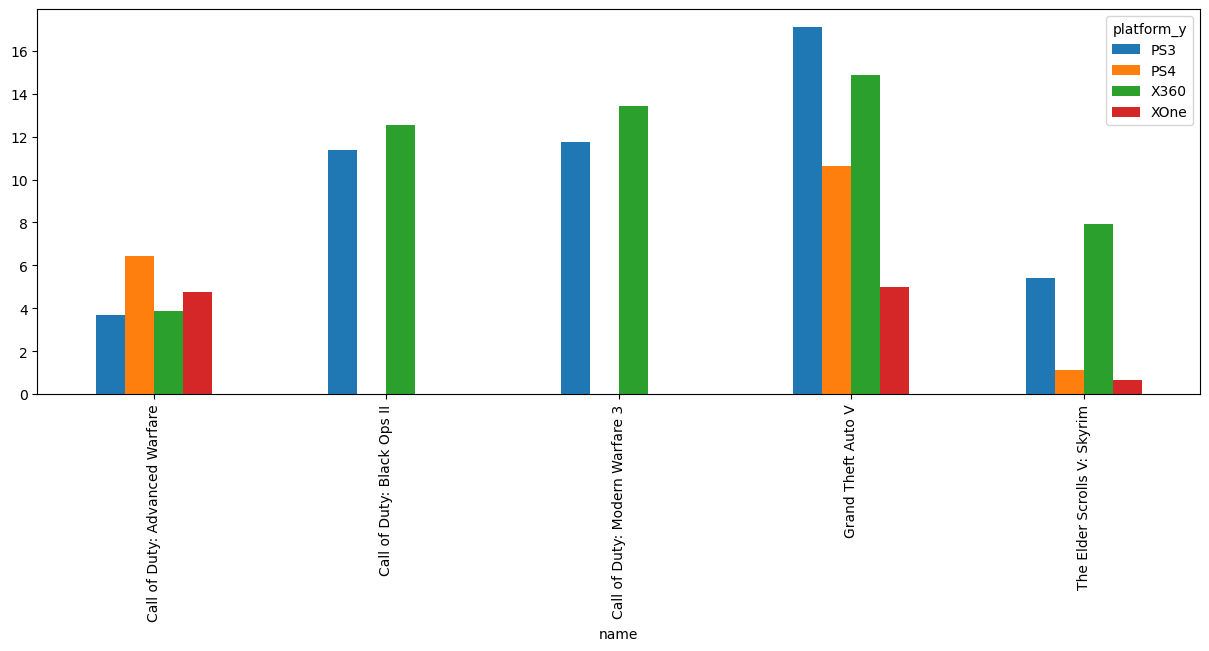

In [30]:
games_pivot.plot(kind='bar',figsize=[15,5])

Por medio de la gráfica anterior, teniendo como base los 5 juegos con mayores ventas en el  mercado se puede concluir que:
No importando el juego, las plataformas X360 y PS3 se mantienen con la mayor participacion con la excepcion de Call of Duty:Advanced Warfare que tuvo mayor exito en PS4. 


### Para este apartado se busca analizar el comportamiento de los generos en las plataformas mas exitosas 

In [31]:
na_platforms=platform_top_2 .groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_genre=platform_top_2.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_concat=pd.concat([na_platforms,na_genre],axis='columns')
na_concat

,platform,na_sales,genre,na_sales
0,X360,226.80,Action,192.07
1,PS3,168.26,Shooter,181.59
2,PS4,108.74,Sports,98.26
3,XOne,93.12,Role-Playing,66.63
4,3DS,82.65,Misc,37.39
5,NaN,NaN,Fighting,26.39
6,NaN,NaN,Racing,25.42
7,NaN,NaN,Platform,24.26
8,NaN,NaN,Adventure,13.17
9,NaN,NaN,Simulation,10.83


In [32]:
na_platforms = platform_top_2.groupby(['platform','genre'])['na_sales'].sum().reset_index()
na_table=na_platforms.pivot_table(index='platform',columns='genre',values='na_sales')


<Axes: xlabel='platform'>

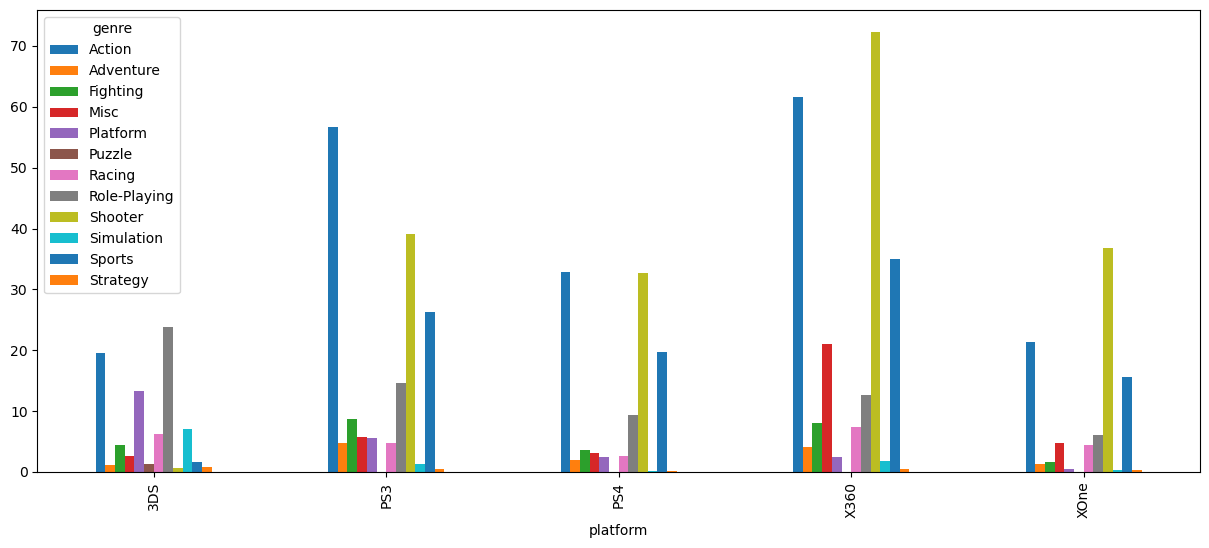

In [33]:
na_table.plot(kind='bar',figsize=[15,6])

En este análisis, como era de esperarse el género acción y shooter representa una gran ventaja para cada plataforma, en este caso con excepcion de 3DS que no presenta un exito en shooter y por el contrario a las demas pplataformas, prevalece el role-playing.Géneros como el sports tambien muestran una participacion favorable.

### En este apartado se tiene como fin, analizar pruebas hipotesis de semejanza para las plataformas más exitosas y los géneros más vendidos 

#### Prueba de hipótesis para plataformas X360 y PS3

In [34]:
import numpy as np
import seaborn as sn
from scipy import stats


In [35]:
games['platform'].unique()
X360=games[games['platform']=='X360']['user_score'].dropna()
PS3=games[games['platform']=='PS3']['user_score'].dropna()


#### H0:las calificaciones promedio de las plataformas X360 y PS3 son las mismas
#### H1:las calificaciones promedio de las plataformas X360 y PS3 son diferentes 

In [36]:
alpha=0.05
t_stat,p_value=stats.ttest_ind(X360,PS3,equal_var=True)
print('Estadistico t:',t_stat)
print('Estadistico p:',p_value/2)

if p_value/2<alpha:
    print('Rechazamos la hipotesis nula:las calificaciones promedio son diferentes')
else:
    print('No hay evidencia suficiente para rechazar la hipotesis nula,las calificaciones son las mismas')


Estadistico t: -2.5025950189382034
Estadistico p: 0.006266230574919955
Rechazamos la hipotesis nula:las calificaciones promedio son diferentes


#### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [37]:
action=games[games['genre']=='Action']['user_score'].dropna()
sports=games[games['genre']=='Sports']['user_score'].dropna()

##### H0:hipotesis nula,las calificaciones promedio para los generos de accion y deportes son iguales
##### H1:hipotesis alternativa,las calificaciones promedio para los generos de accion y deportes son diferentes

In [38]:
alpha=0.05

t_stat,p_value=stats.ttest_ind(action,sports,equal_var=True)

print('Estadistico t:',t_stat)
print('Estadistico p:',p_value/2)

if p_value/2<alpha:
    print('Rechazamos la hipotesis nula,las calificaciones promedio son diferentes')
else:
    print('No hay evidencia suficiente para rechazar la hipotesis nula, las calificaciones promedio son iguales')
    


Estadistico t: 10.399926387716395
Estadistico p: 2.5987275126076027e-24
Rechazamos la hipotesis nula,las calificaciones promedio son diferentes
